In [ ]:
import logging
import mayavi.mlab as mlab
import seaborn as sns

logging.captureWarnings(True)
sns.set_context("paper")

# Network Action of SCCwm-DBS
## Support Modeling : Virtual Dissection

In this notebook we'll perform the virtual dissection of OnTarget SCCwm-DBS effects along engaged traactography

In [6]:
from dbspace.control import offline_segments
from dbspace.control.DTI_support import (
    DTI_support_model,
    plot_support_model,
    plot_EEG_masks,
)

In [7]:

condit = "OnT"
pt_list = ["906","907","908"]

In [8]:

eFrame = offline_segments.network_action_dEEG(
    pts=pt_list, procsteps="conservative", condits=[condit], config_file='../../analysis/configs/targeting_experiment.json'
)
eFrame.standard_pipeline()
eFrame.OnT_ctrl_dyn(condit=condit)


/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/mne/channels/montage.py:186: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ch_names_ = data['f0'].astype(np.str)


Doing standard init pipeline
Pooling Patient Observations
Computing Bootstrap Median Response for POOL


/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/cortical_signatures/.venv/lib/python3.8/site-packages/mne/channels/montage.py:186: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ch_names_ = data['f0'].astype(np.str)
/home/virati/Dropbox/projects/Research/MDD-DBS/Ephys/DBSpace/src/dbspace/control/DTI_support.py:454: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.ht

Computing Median Response for 906
Doing <function median at 0x7fd3d3419700>
43
129
Primary mean: 0.6686322941074341
Secondary mean: -0.38372633454540495
KstestResult(statistic=0.6511627906976745, pvalue=2.020605904817785e-13)


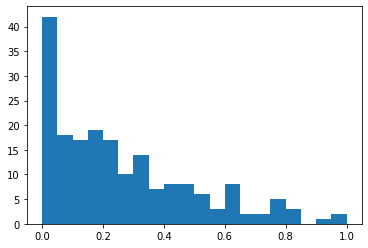

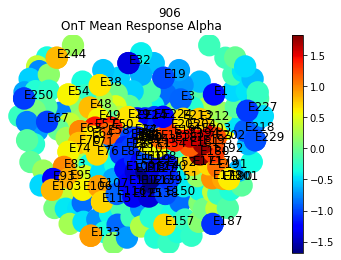

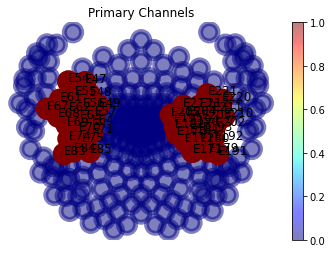

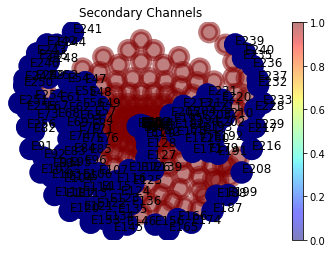

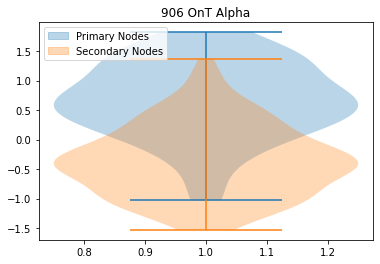

In [9]:
# Virtual Dissection Here
band = "Alpha"
pt='906'

EEG_support = DTI_support_model(
    pt,
    4,
    dti_parcel_thresh=20,
    eeg_thresh=50,
    electrode_map_file="../../assets/experiments/metadata/Electrode_Map.json",
)

plot_support_model(
    EEG_support,
    pt,
    layers=[1, 0, 0],
    electrode_map_file="../../assets/experiments/metadata/Electrode_Map.json",
)

plot_EEG_masks(EEG_support)

eFrame.support_analysis(
    support_struct=EEG_support,
    condit=condit,
    pt=pt,
    band=band,
    voltage=str(3),
)


In [11]:
import mayavi.mlab as mlab
mlab.show()